# Process three-echo resting state dataset for software demo

In [1]:
%matplotlib inline
import os
import os.path as op
from glob import glob

from tedana.workflows import tedana_workflow

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Download data

In [2]:
%%time
dset_dir = 'three-echo-dataset/'
wd = os.getcwd()
if not op.isdir(dset_dir):
    os.mkdir(dset_dir)

!curl -L --create-dirs -o three-echo-dataset/three_echo_Cornell_zcat.nii.gz https://osf.io/e3hsn/download

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   459  100   459    0     0   1588      0 --:--:-- --:--:-- --:--:--  1663
100  125M  100  125M    0     0   915k      0  0:02:19  0:02:19 --:--:-- 2372k 0   983k      0  0:02:10  0:00:04  0:02:06 1570k 876k      0  0:02:26  0:00:08  0:02:18  907k3:05  0:00:43  0:02:22  596k.2M    0     0   716k      0  0:02:58  0:00:49  0:02:09  803k      0  0:02:43  0:01:37  0:01:06  844k    0   825k      0  0:02:35  0:01:57  0:00:38  889k     0  0:02:33  0:02:00  0:00:33 1107k 0     0   838k      0  0:02:32  0:02:01  0:00:31 1153k  0:02:27  0:02:18  0:00:09 1161k
CPU times: user 3.16 s, sys: 806 ms, total: 3.96 s
Wall time: 2min 20s


## Run workflow

INFO:tedana.workflows.tedana:Using output directory: /Users/tsalo/Documents/tsalo/tedana-ohbm2019/three-echo-dataset
INFO:tedana.workflows.tedana:Loading input data: ['three-echo-dataset/three_echo_Cornell_zcat.nii.gz']
INFO:tedana.workflows.tedana:Computing EPI mask from first echo
INFO:tedana.workflows.tedana:Computing T2* map
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
INFO:tedana.combine:Optimally combining data with voxel-wise T2 estimates
INFO:tedana.decomposition.pca:Computing PCA of optimally combined multi-echo data
INFO:tedana.combine:Optimally combining data with voxel-wise T2 estimates
INFO:te

CPU times: user 14min 10s, sys: 1min 22s, total: 15min 33s
Wall time: 12min 19s


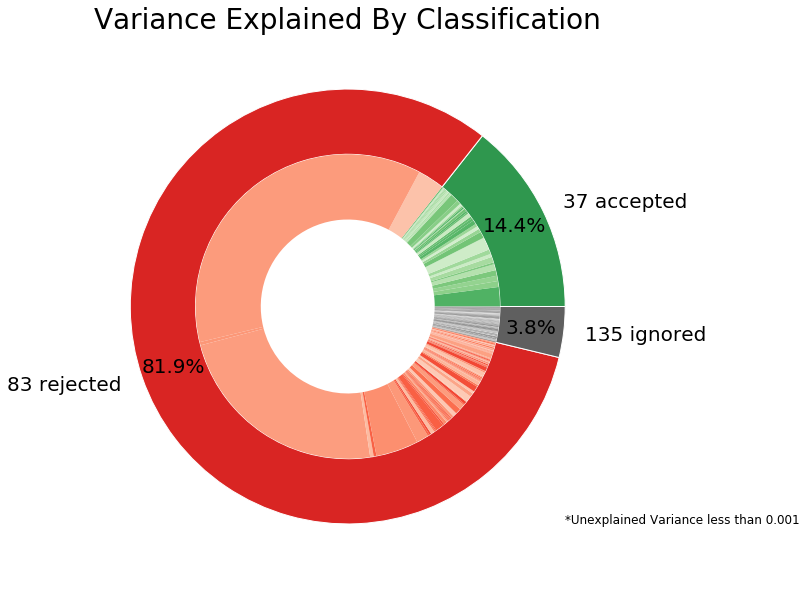

In [3]:
%%time
file_ = op.join(dset_dir, 'three_echo_Cornell_zcat.nii.gz')
tes = [14.5, 38.5, 62.5]
tedana_workflow(file_, tes, out_dir=dset_dir, png=True, fixed_seed=17)

In [4]:
os.chdir(wd)